In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
data=pd.read_csv("E:\\Datasets\\seattle-weather.csv")

In [6]:
data

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [7]:
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [9]:
features = ["precipitation", "temp_max", "temp_min", "wind"]
X = data[features]
X

,precipitation,temp_max,temp_min,wind
0,0.0,12.8,5.0,4.7
1,10.9,10.6,2.8,4.5
2,0.8,11.7,7.2,2.3
3,20.3,12.2,5.6,4.7
4,1.3,8.9,2.8,6.1
...,...,...,...,...
1456,8.6,4.4,1.7,2.9
1457,1.5,5.0,1.7,1.3
1458,0.0,7.2,0.6,2.6
1459,0.0,5.6,-1.0,3.4


In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled 

array([[-0.45364986, -0.49529914, -0.64421175,  1.01497975],
       [ 1.17859791, -0.79473121, -1.08234662,  0.87583314],
       [-0.33385186, -0.64501518, -0.20607688, -0.65477956],
       ...,
       [-0.45364986, -1.25748987, -1.52048149, -0.44605965],
       [-0.45364986, -1.47525865, -1.83912504,  0.11052679],
       [-0.45364986, -1.47525865, -2.05819247,  0.18010009]])

In [12]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
X_pca 

array([[-0.86978162,  0.06119436,  1.06345488,  0.07149117],
       [-1.78079141,  0.80151181, -0.16673354,  0.34323363],
       [-0.30131518, -0.84400372, -0.22974058, -0.37787795],
       ...,
       [-1.56542501, -1.35490468,  0.06646489,  0.08469007],
       [-2.0555218 , -1.14000523,  0.47338619,  0.16705402],
       [-2.21228182, -1.16917993,  0.53564872,  0.3204473 ]])

In [13]:
explained_variance = pca.explained_variance_ratio_

print("\nExplained Variance Ratio:")
for i, var in enumerate(explained_variance, 1):
    print(f"PC{i}: {var*100:.2f}%")


Explained Variance Ratio:
PC1: 49.71%
PC2: 30.73%
PC3: 16.83%
PC4: 2.74%


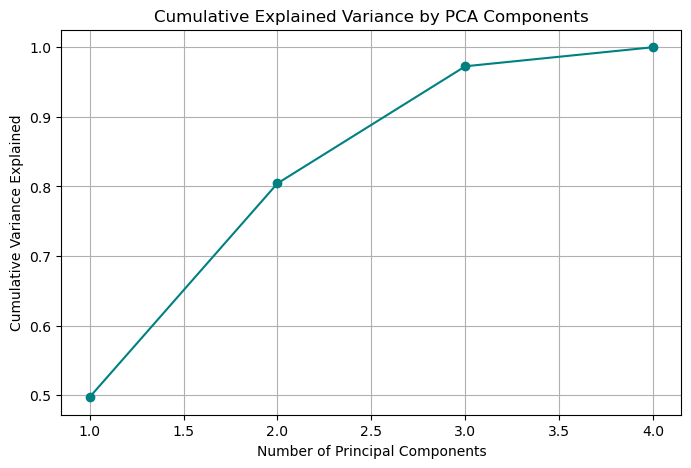

In [14]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', color='teal')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Variance Explained")
plt.grid(True)
plt.show()

In [16]:
X_pca_2d = PCA(n_components=2).fit_transform(X_scaled)
X_pca_2d

array([[-0.86978162,  0.06119436],
       [-1.78079141,  0.80151181],
       [-0.30131518, -0.84400372],
       ...,
       [-1.56542501, -1.35490468],
       [-2.0555218 , -1.14000523],
       [-2.21228182, -1.16917993]])

In [17]:
data["PC1"] = X_pca_2d[:, 0]
data["PC2"] = X_pca_2d[:, 1]

In [19]:
data["PC1"]

0      -0.869782
1      -1.780791
2      -0.301315
3      -1.719245
4      -1.807821
          ...   
1456   -2.104042
1457   -1.461347
1458   -1.565425
1459   -2.055522
1460   -2.212282
Name: PC1, Length: 1461, dtype: float64

In [20]:
data["PC2"]

0       0.061194
1       0.801512
2      -0.844004
3       2.026200
4       0.572753
          ...   
1456   -0.395737
1457   -1.792884
1458   -1.354905
1459   -1.140005
1460   -1.169180
Name: PC2, Length: 1461, dtype: float64

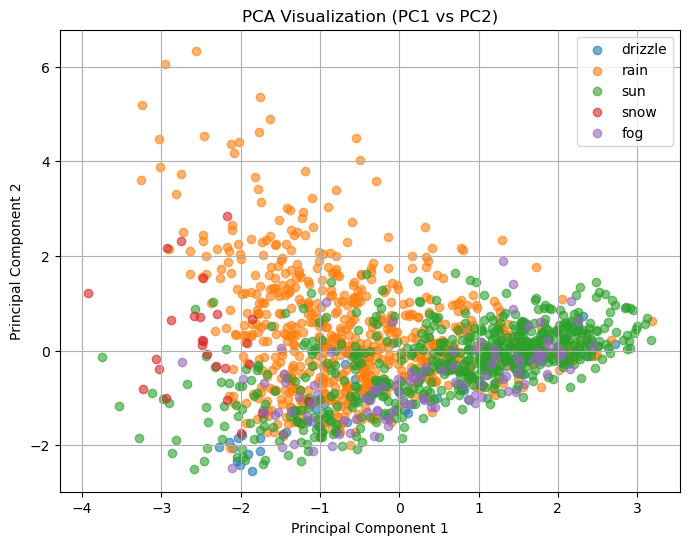

In [21]:
plt.figure(figsize=(8,6))
for weather_type in data["weather"].unique():
    subset = data[data["weather"] == weather_type]
    plt.scatter(subset["PC1"], subset["PC2"], label=weather_type, alpha=0.6)

plt.title("PCA Visualization (PC1 vs PC2)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()